# **Import the NCIA dataset from Google Drive.**

In [0]:
import os
import pickle
import numpy as np

_slice = 4

_dir = '/content/drive/My Drive/Bachelor Thesis/Model-Data/{}-slice'.format(_slice)

# read the training data
with open(_dir + '/train_data_{:02d}.pxl'.format(_slice), 'rb') as f:
  train = np.array(pickle.load(f))
with open(_dir + '/train_label_{:02d}.pxl'.format(_slice), 'rb') as f:
  x_label = np.array(pickle.load(f))

# read the testing data
with open(_dir + '/test_data_{:02d}.pxl'.format(_slice), 'rb') as f:
  test = np.array(pickle.load(f))
with open(_dir + '/test_label_{:02d}.pxl'.format(_slice), 'rb') as f:
  y_label = np.array(pickle.load(f))

# **Prepare the data.**

In [0]:
#normalize the data
x_train = train.astype('float32') / 2000.
y_train = test.astype('float32') / 2000.

#reshape the data
x_train = np.reshape(x_train, (len(x_train), 160, 160, 1))
y_train = np.reshape(y_train, (len(y_train), 160, 160, 1))

#vectorize the labels
x_label = np.asarray(x_label).astype('float32')
y_label = np.asarray(y_label).astype('float32')

#display data shape
print("Input shape", x_train.shape)
print("Label shape", x_label.shape)

# **Build convolutional autoencoder.**

## Convolutional Autoencoder with Batch Normalization

Build the model.

In [0]:
from keras import regularizers
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

#input placeholder
input_img = Input(shape=(160, 160, 1))

#encoder
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
conv1 = BatchNormalization()(conv1)
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
conv3 = BatchNormalization()(conv3)


#decoder
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)
conv4 = BatchNormalization()(conv4)
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv4)
conv4 = BatchNormalization()(conv4)
up1 = UpSampling2D((2,2))(conv4)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up1)
conv5 = BatchNormalization()(conv5)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)
conv5 = BatchNormalization()(conv5)
up2 = UpSampling2D((2,2))(conv5)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2)

#autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='mean_squared_error', optimizer='rmsprop')
autoencoder.summary()

Train the model.

In [0]:
hist = autoencoder.fit(x_train, x_train, 
                       batch_size=64,
                       epochs=150,
                       verbose=2,
                       validation_data=(y_train, y_train))

## Autoencoder Classification

Learning parameters.

In [0]:
from keras.layers import Input

epochs = 150
batch_size = 64

input_img = Input(shape=(160, 160, 1))

Using TensorFlow backend.


Encoder and Decoder.

In [0]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization

#0.51
def encoder4(input_img):
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
  x = BatchNormalization()(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  encoded = BatchNormalization()(x)
  return encoded

def decoder4(encoded):    
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2, 2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  return decoded

#0.49
def encoder3(input_img):
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
  encoded = BatchNormalization()(x)
  return encoded

def decoder3(encoded):    
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  return decoded

#0.49
def encoder2(input_img):
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  encoded = BatchNormalization()(x)
  return encoded

def decoder2(encoded):    
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  return decoded

#0.55
def encoder(input_img):
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  encoded = BatchNormalization()(x)
  return encoded

def decoder(encoded):    
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = UpSampling2D((2,2))(x)
  decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
  return decoded

Build the model.

In [0]:
autoencoder = Model(input_img, decoder4(encoder4(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer='rmsprop')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 160, 160, 8)       80        
_________________________________________________________________
batch_normalization_11 (Batc (None, 160, 160, 8)       32        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 160, 160, 8)       584       
_________________________________________________________________
batch_normalization_12 (Batc (None, 160, 160, 8)       32        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 80, 80, 16)        1168

Train the model.

In [0]:
hist = autoencoder.fit(x_train, x_train, 
                       batch_size=64,
                       epochs=300,
                       verbose=2,
                       validation_data=(y_train, y_train))

Train on 818 samples, validate on 817 samples
Epoch 1/300
 - 10s - loss: 0.0498 - val_loss: 0.0914
Epoch 2/300
 - 2s - loss: 0.0234 - val_loss: 0.0840
Epoch 3/300
 - 2s - loss: 0.0171 - val_loss: 0.0764
Epoch 4/300
 - 2s - loss: 0.0129 - val_loss: 0.0687
Epoch 5/300
 - 2s - loss: 0.0104 - val_loss: 0.0604
Epoch 6/300
 - 2s - loss: 0.0082 - val_loss: 0.0540
Epoch 7/300
 - 2s - loss: 0.0068 - val_loss: 0.0556
Epoch 8/300
 - 2s - loss: 0.0061 - val_loss: 0.0482
Epoch 9/300
 - 2s - loss: 0.0052 - val_loss: 0.0469
Epoch 10/300
 - 2s - loss: 0.0050 - val_loss: 0.0333
Epoch 11/300
 - 2s - loss: 0.0045 - val_loss: 0.0300
Epoch 12/300
 - 2s - loss: 0.0038 - val_loss: 0.0244
Epoch 13/300
 - 2s - loss: 0.0040 - val_loss: 0.0241
Epoch 14/300
 - 2s - loss: 0.0037 - val_loss: 0.0280
Epoch 15/300
 - 2s - loss: 0.0033 - val_loss: 0.0231
Epoch 16/300
 - 2s - loss: 0.0032 - val_loss: 0.0228
Epoch 17/300
 - 2s - loss: 0.0032 - val_loss: 0.0227
Epoch 18/300
 - 2s - loss: 0.0029 - val_loss: 0.0399
Epoch 19

Save the model.

In [0]:
autoencoder.save('/content/drive/My Drive/Bachelor Thesis/autoencoder_300_4.h5')

Define the fully connected layers that will be stacked up with the encoder function.

In [0]:
from keras.layers import Flatten, Dense, Dropout

def fc4(enco):
  flat = Flatten()(enco)
  drop = Dropout(0.25)(flat)
  den1 = Dense(1024, activation='relu')(drop)
  out  = Dense(1, activation='sigmoid')(den1)

  return out

def fc3(enco):
  flat = Flatten()(enco)
  drop = Dropout(0.5)(flat)
  den1 = Dense(512, activation='relu')(drop)
  out  = Dense(1, activation='sigmoid')(den1)

  return out

def fc2(enco):
  flat = Flatten()(enco)
  drop = Dropout(0.5)(flat)
  den1 = Dense(128, activation='relu')(drop)
  out  = Dense(1, activation='sigmoid')(den1)

  return out

def fc(enco):
  flat = Flatten()(enco)
  drop = Dropout(0.25)(flat)
  den1 = Dense(1024, activation='relu')(drop)
  den2 = Dense(512, activation='relu')(den1)
  out  = Dense(1, activation='sigmoid')(den2)
  
  return out

In [0]:
encode = encoder4(input_img)
full_model = Model(input_img, fc4(encode))

In [0]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/My Drive/Bachelor Thesis/autoencoder_300_4.h5')

for l1, l2 in zip(full_model.layers[:15], model.layers[:15]):
  l1.set_weights(l2.get_weights())

Verify the weights of the encoder part are the same as the weights loaded for the classification model.

In [0]:
model.get_weights()[0][1]

In [0]:
full_model.get_weights()[0][1]

Disable the training for the encoder layers.

In [0]:
for layer in full_model.layers[0:15]:
  layer.trainable = False

In [0]:
full_model.compile(loss='binary_crossentropy', optimizer='adam')
full_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 160, 160, 8)       80        
_________________________________________________________________
batch_normalization_21 (Batc (None, 160, 160, 8)       32        
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 160, 160, 8)       584       
_________________________________________________________________
batch_normalization_22 (Batc (None, 160, 160, 8)       32        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 80, 80, 8)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 80, 80, 16)        1168

Train the model.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

#create augmented image generator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# compute quantities required for featurewise normalization
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
hist = full_model.fit(datagen.flow(x_train, x_label, batch_size=32), steps_per_epoch=len(x_train) / 32, epochs=150, verbose=2, validation_data=(y_train, y_label))

#hist = full_model.fit(x_train, x_label, batch_size=64, epochs=150, verbose=2, validation_data=(y_train, y_label))

Epoch 1/150
 - 2s - loss: 7.8488 - val_loss: 0.7135
Epoch 2/150
 - 2s - loss: 0.7530 - val_loss: 0.6907
Epoch 3/150
 - 2s - loss: 0.8497 - val_loss: 0.6498
Epoch 4/150
 - 2s - loss: 0.6156 - val_loss: 0.6019
Epoch 5/150
 - 2s - loss: 0.7154 - val_loss: 0.5985
Epoch 6/150
 - 2s - loss: 0.6819 - val_loss: 0.6524
Epoch 7/150
 - 2s - loss: 0.6031 - val_loss: 0.6271
Epoch 8/150
 - 2s - loss: 0.5530 - val_loss: 0.5919
Epoch 9/150
 - 2s - loss: 0.5776 - val_loss: 0.6147
Epoch 10/150
 - 2s - loss: 0.5656 - val_loss: 0.6077
Epoch 11/150
 - 2s - loss: 0.5700 - val_loss: 0.6437
Epoch 12/150
 - 2s - loss: 0.5846 - val_loss: 0.6054
Epoch 13/150
 - 2s - loss: 0.5868 - val_loss: 0.5927
Epoch 14/150
 - 2s - loss: 0.5449 - val_loss: 0.5863
Epoch 15/150
 - 2s - loss: 0.5510 - val_loss: 0.5783
Epoch 16/150
 - 2s - loss: 0.5336 - val_loss: 0.5813
Epoch 17/150
 - 2s - loss: 0.5426 - val_loss: 0.5841
Epoch 18/150
 - 2s - loss: 0.5330 - val_loss: 0.5808
Epoch 19/150
 - 2s - loss: 0.5740 - val_loss: 0.6017
Ep

Plot the model loss.

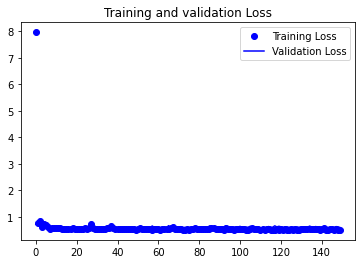

In [0]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(150)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

# **Binary Classification**

# Confusion matrix

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot a confusion matrix.
#cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if sys.path[0] == '':


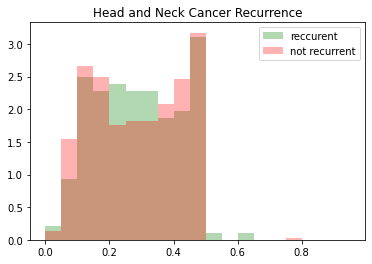

Confusion matrix, without normalization
[[213 411]
 [ 57 136]]
Normalized confusion matrix
[[0.34 0.66]
 [0.3  0.7 ]]


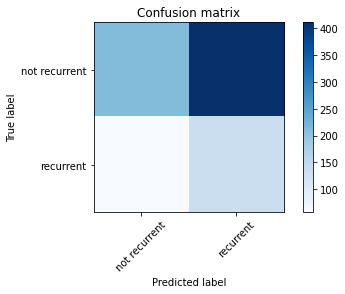

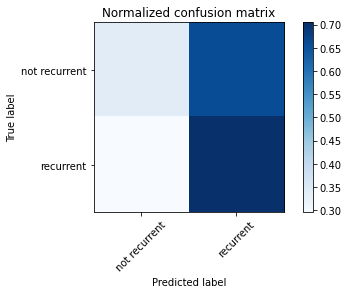

In [0]:
import numpy as np

from matplotlib import pyplot as plt 
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

labels = ['not recurrent', 'recurrent']
pred = full_model.predict(y_train)

rec, not_rec = [], []
for (_pred, _label) in zip(pred, y_label):
  (not_rec, rec)[_label == 1].append(_pred[0])

#plot prediction histogram
_bins = np.arange(0, 1, 0.05)
plt.hist(rec, bins = _bins, histtype='stepfilled', color='green', alpha=0.3, density=True, label='reccurent') 
plt.hist(not_rec, bins = _bins, histtype='stepfilled', color='red', alpha=0.3, density=True, label='not recurrent') 
plt.title("Head and Neck Cancer Recurrence")
plt.legend(loc='upper right')
plt.show()

result = []
for x in pred:
  temp = 1 if x[0] > 0.20 else 0
  result.append(temp)

#compute confusion matrix
cm = confusion_matrix(y_label, result)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title='Normalized confusion matrix')

plt.show()

# ROC curve

In [0]:
from sklearn.metrics import roc_curve, auc

#plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y_label, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

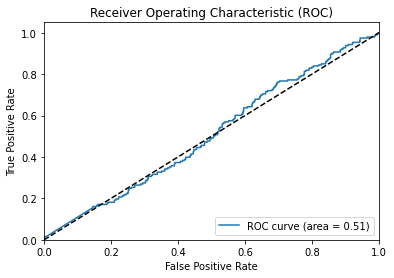

In [0]:
pred = full_model.predict(y_train)

plot_roc(pred,y_label)

# **Display Encoding.**

Autoencoder image reconstruction.

In [0]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(y_train)

# number of scans to display
scans = 10

plt.figure(figsize=(20, 4))
for i in range(scans):
    # display original
    ax = plt.subplot(2, scans, i + 1)
    plt.imshow(y_train[i].reshape(160, 160), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, scans, i + scans + 1)
    plt.imshow(decoded_imgs[i].reshape(160, 160), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Autoencoder loss progression.

In [0]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(150)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Show dataset images with T-sne projection of latent space encoding.

In [0]:
import cv2
from sklearn import manifold
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Scatter with images instead of points
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        label = test_label[i]
        if label == 0:
          ax.text(x0, y0, label, color='g', ha='center', va='center')
        else:
          ax.text(x0, y0, label, color='r', ha='center', va='center')

    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

#encoder = Model(input_img, encoded)
x_encoded = full_model.predict(y_train)

# Compute t-SNE embedding of latent space
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(x_encoded)

# Plot images according to t-sne embedding
fig, ax = plt.subplots()
imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=y_train, ax=ax, zoom=0.2)
plt.show()